# CASE STUDY 7

# SUPERVISED LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel('iris.xls')

In [4]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.tail(10)

,SL,SW,PL,PW,Classification
140,6.7,3.1,5.6,2.4,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
data['SL'].nunique()

35

In [10]:
data['SL'].skew()

0.3068227108046868

In [11]:
data.skew(axis=0)

SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

<AxesSubplot:>

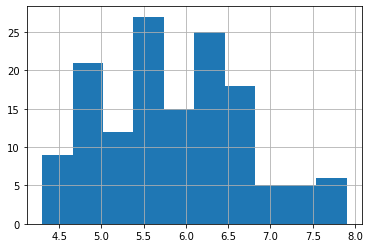

In [12]:
data['SL'].hist()

In [13]:
data.loc[data['SL'].isna()]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [14]:
data.loc[data['SL'].isna(), 'SL'] = data['SL'].median()

In [15]:
data['SL'].isna().sum()

0

In [16]:
data.loc[data['SW'].isna()]

,SL,SW,PL,PW,Classification
10,5.4,NaN,1.5,0.2,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
72,6.3,NaN,4.9,1.5,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor
124,6.7,NaN,5.7,2.1,Iris-virginica


In [17]:
data.loc[data['SW'].isna(), 'SW'] = data['SW'].median()

In [18]:
data['SW'].isna().sum()

0

In [19]:
data.loc[data['PL'].isna()]

,SL,SW,PL,PW,Classification
28,5.2,3.4,NaN,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
56,6.3,3.3,NaN,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
109,7.2,3.6,NaN,2.5,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


In [20]:
data.loc[data['PL'].isna(), 'PL'] = data['PL'].median()
data['SW'].isna().sum()

0

In [21]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [22]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [23]:
y = pd.DataFrame(data['Classification'])
x = data.drop(['Classification'], axis = 1)

In [24]:
y.head()

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [25]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
    y[a[i]] = label_en.fit_transform(y[a[i]])

In [27]:
y.value_counts()

Classification
0                 50
1                 50
2                 50
dtype: int64

# 3. Find out which classification model gives the best result to predict iris species (also do random forest algorithm)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

In [29]:
x_train.shape

(120, 4)

In [30]:
y_train.shape

(120, 1)

In [31]:
x_test.shape

(30, 4)

In [32]:
y_test.shape

(30, 1)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [35]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

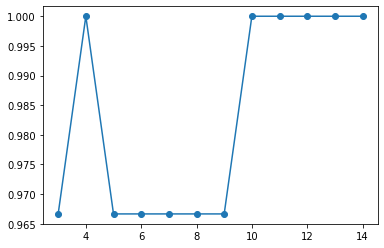

In [36]:
plt.plot(neighbors, acc_values, 'o-')

In [37]:
classifier = KNeighborsClassifier(n_neighbors=4, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [38]:
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [39]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [43]:
y_test.value_counts()

Classification
2                 11
0                 10
1                  9
dtype: int64

In [44]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [45]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [47]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(x_train,y_train)
y_pred_p = svm_poly.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred_p))
confusion_matrix(y_test, y_pred_p)

Accuracy is 0.9666666666666667


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [49]:
y_pred_p

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [51]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])